In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [89]:
usecols = ['neighbourhood_group', 'room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

df = pd.read_csv('AB_NYC_2019.csv', usecols=usecols)

In [90]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [91]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,48885,48886,48887,48888,48889,48890,48891,48892,48893,48894
neighbourhood_group,brooklyn,manhattan,manhattan,brooklyn,manhattan,manhattan,brooklyn,manhattan,manhattan,manhattan,...,manhattan,manhattan,brooklyn,manhattan,queens,brooklyn,brooklyn,manhattan,manhattan,manhattan
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344,...,40.79633,40.75561,40.71232,40.76392,40.69137,40.67853,40.70184,40.81475,40.75751,40.76404
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037,...,-73.93605,-73.96723,-73.9422,-73.99183,-73.80844,-73.94995,-73.93317,-73.94867,-73.99112,-73.98933
room_type,private_room,entire_home/apt,private_room,entire_home/apt,entire_home/apt,entire_home/apt,private_room,private_room,private_room,entire_home/apt,...,private_room,entire_home/apt,entire_home/apt,private_room,private_room,private_room,private_room,entire_home/apt,shared_room,private_room
price,149,225,150,89,80,200,60,79,79,150,...,75,200,170,125,65,70,40,115,55,90
minimum_nights,1,1,3,1,10,3,45,2,2,1,...,2,6,1,4,1,2,4,10,1,7
number_of_reviews,9,45,0,270,9,74,49,430,118,160,...,0,0,0,0,0,0,0,0,0,0
reviews_per_month,0.21,0.38,NaN,4.64,0.1,0.59,0.4,3.47,0.99,1.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculated_host_listings_count,6,2,1,1,1,1,1,1,1,4,...,2,1,3,1,2,2,2,1,6,1
availability_365,365,355,365,194,0,129,0,220,0,188,...,353,176,365,31,163,9,36,27,2,23


In [92]:
df.dtypes

neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [93]:
df.isna().any()
df.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [94]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [95]:
#Question 1
#What is the most frequent observation (mode) for the column 'neighbourhood_group'?
df['neighbourhood_group'].describe()
df['neighbourhood_group'].mode()

0    manhattan
dtype: object

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [98]:
df_train2 = df_train.copy()
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [99]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [100]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [101]:
#Question 2
#Create the correlation matrix for the numerical features of your train dataset.
#In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
#What are the two features that have the biggest correlation in this dataset?
categorical = [
    'neighbourhood_group',
    'room_type'
]
numerical = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
print(df_full_train[numerical].corrwith(df_full_train.price))

df_full_train.corr()
# reviews_per_month number_of_reviews

latitude                          0.035015
longitude                        -0.149080
minimum_nights                    0.042740
number_of_reviews                -0.048926
reviews_per_month                -0.051978
calculated_host_listings_count    0.055336
availability_365                  0.080562
dtype: float64


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080704,0.035015,0.025497,-0.011836,-0.013809,0.020299,-0.008341
longitude,0.080704,1.000000,-0.149080,-0.063498,0.057570,0.134401,-0.115289,0.082994
price,0.035015,-0.149080,1.000000,0.042740,-0.048926,-0.051978,0.055336,0.080562
minimum_nights,0.025497,-0.063498,0.042740,1.000000,-0.077860,-0.121687,0.121748,0.140596
number_of_reviews,-0.011836,0.057570,-0.048926,-0.077860,1.000000,0.584935,-0.072603,0.175428
reviews_per_month,-0.013809,0.134401,-0.051978,-0.121687,0.584935,1.000000,-0.047368,0.165565
calculated_host_listings_count,0.020299,-0.115289,0.055336,0.121748,-0.072603,-0.047368,1.000000,0.223328
availability_365,-0.008341,0.082994,0.080562,0.140596,0.175428,0.165565,0.223328,1.000000


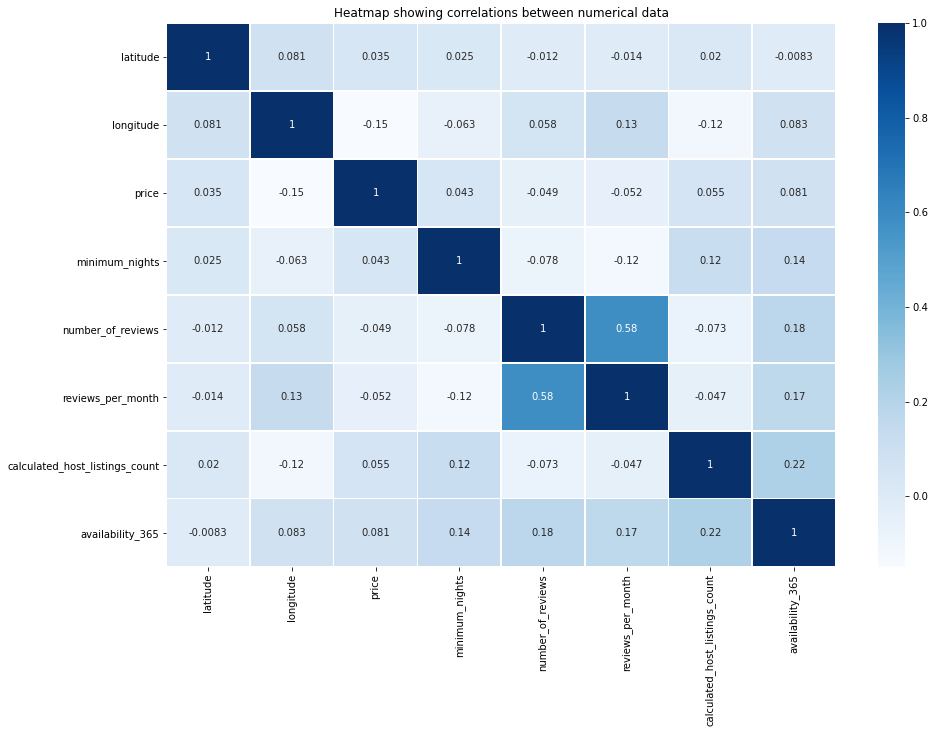

In [102]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_full_train.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [103]:
df_full_train.corr().unstack().sort_values(ascending = False)

latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
number_of_reviews               number_of_reviews                 1.000000
                                                                    ...   
calculated_host_listings_count  longitude                        -0.115289
minimum_nights                  reviews_per_month                -0.121687
reviews_per_month               minimum_nights                   -0.121687
price                           longitude                        -0.149080
longitude                       price                            -0.149080
Length: 64, dtype: float64

In [104]:
df = df_train2.copy()
df['above_average'] = (df.price >=152).astype(int)
df

# OR: mean = df['price'].mean()
#     df['above_average'] = np.where(df['price']>=mean,1,0)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
13575,brooklyn,40.72760,-73.94495,entire_home/apt,99,3,29,0.70,13,50,0
48476,manhattan,40.70847,-74.00498,private_room,57,1,0,0.00,1,7,0
44499,bronx,40.83149,-73.92766,entire_home/apt,70,40,0,0.00,1,0,0
17382,brooklyn,40.66448,-73.99407,entire_home/apt,130,2,3,0.08,1,0,0
14638,manhattan,40.74118,-74.00012,private_room,110,1,48,1.80,2,67,0
...,...,...,...,...,...,...,...,...,...,...,...
13198,brooklyn,40.71748,-73.95685,private_room,50,6,5,0.13,1,0,0
14583,brooklyn,40.66397,-73.98538,private_room,125,1,7,0.17,2,0,0
6168,manhattan,40.79994,-73.97001,private_room,299,1,1,0.64,1,88,1
12248,brooklyn,40.69585,-73.96344,private_room,65,60,0,0.00,1,0,0


In [105]:
#Question 3
#Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. 
#Use the training set only.
#Which of these two variables has bigger score?
#Round it to 2 decimal digits using round(score, 2)
from sklearn.metrics import mutual_info_score
def mutual_info_price_score(series):
    return mutual_info_score(series, df.above_average)

mi = df[categorical].apply(mutual_info_price_score)
mi.sort_values(ascending=False).to_frame(name='MI')
#round(mi.max(), 2)

,MI
room_type,0.143226
neighbourhood_group,0.046506


In [106]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_train_bin = (y_train >=152).astype(int)
y_val_bin = (y_val >=152).astype(int)
y_test_bin = (y_test >=152).astype(int)

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=10000)
model.fit(X_train, y_train_bin)

LogisticRegression(max_iter=10000, random_state=42)

In [108]:
y_pred = model.predict_proba(X_val)[:, 1]

In [109]:
above_decision = (y_pred >= 0.5)
above_decision.astype(int)

array([0, 1, 0, ..., 0, 0, 1])

In [110]:
# compare learning and val set in binary format - logistic regression - python style
(above_decision == y_val_bin).mean()

0.790878412925657

In [111]:
from sklearn.metrics import accuracy_score
# compare learning and val set in binary format - logistic regression - lib style
accuracy = accuracy_score(y_val_bin, above_decision)
accuracy

0.790878412925657

In [112]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
customer = dicts_test[-1]
customer

{'neighbourhood_group': 'manhattan',
 'room_type': 'private_room',
 'latitude': 40.72978,
 'longitude': -73.9793,
 'minimum_nights': 3,
 'number_of_reviews': 28,
 'reviews_per_month': 0.33,
 'calculated_host_listings_count': 1,
 'availability_365': 364}

In [113]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[0, 1]

0.25692803011656756

In [114]:
y_test[-1] # 125<152 right

125

In [69]:
# Feature elimination influense
#neighbourhood_group
#room_type
#number_of_reviews
#reviews_per_month

orig_score = accuracy
features = categorical + numerical
features

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train_bin)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val_bin, y_pred)
    print(c, orig_score - score, score)
    

neighbourhood_group 0.039881378464055595 0.7509970344616014
room_type 0.07454749974435004 0.7163309131813069
latitude 0.004499437570303688 0.7863789753553533
longitude 0.004090397791185141 0.7867880151344718
minimum_nights 0.005215257183761035 0.7856631557418959
number_of_reviews 0.003988137846405504 0.7868902750792515
reviews_per_month 0.005112997238981398 0.7857654156866756
calculated_host_listings_count 0.004192657735964778 0.7866857551896922
availability_365 0.009305654974946287 0.7815727579507107


In [84]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

In [85]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

#def rmse(y, y_pred):
#    se = (y - y_pred) ** 2
#    mse = se.mean()
#    return np.sqrt(mse)

from sklearn.linear_model import Ridge #Regulization if model works bad (this is not)

from sklearn.metrics import mean_squared_error
for r in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=r, random_state=42, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    #RMSE
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    print(r, round(score, 3))


0 0.497
0.01 0.497
0.1 0.497
1 0.497
10 0.498
